## Company Cam Take Home Assessment

The dataset consists of 3 tables: 
1. Users Table: Contains user information (user_id, signup_date, user_type)
2. Events Table: Contains user activity logs (event_id, user_id, event_type, event_timestamp, etc)
3. Subscriptions Table: Contains details on user paid subscriptions (user_id, plan_type, start_date, end_date)

## Exploratory Data Analysis

In [61]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Loading the data tables as pandas dataframes
users=pd.read_csv('user.csv')
events=pd.read_csv('event.csv')
subscriptions=pd.read_csv('subscription.csv')

In [62]:
# Exploring the dataframes
users.head(5)

,user_id,signup_date,user_type
0,1,2023-09-11,Free
1,2,2023-11-27,Free
2,3,2023-09-01,Free
3,4,2023-06-15,Free
4,5,2023-09-15,Free


In [63]:
events.head(5)

,event_id,user_id,event_type,event_timestamp
0,1,1,Upload Photo,2024-02-14
1,2,1,Invite User,2023-11-04
2,3,1,Login,2023-12-22
3,4,1,Login,2024-01-19
4,5,1,View Photo,2023-10-12


In [64]:
subscriptions.head(5)

,subscription_id,user_id,plan_type,start_date,end_date
0,0,16,Pro,2023-10-31,2024-03-09
1,1,19,Pro,2023-06-28,2024-03-14
2,2,24,Pro,2023-07-02,2024-03-08
3,3,28,Pro,2023-09-10,2024-01-21
4,4,32,Pro,2023-07-04,2024-07-06


In [65]:
subscriptions

,subscription_id,user_id,plan_type,start_date,end_date
0,0,16,Pro,2023-10-31,2024-03-09
1,1,19,Pro,2023-06-28,2024-03-14
2,2,24,Pro,2023-07-02,2024-03-08
3,3,28,Pro,2023-09-10,2024-01-21
4,4,32,Pro,2023-07-04,2024-07-06
...,...,...,...,...,...
141,141,479,Pro,2023-07-07,2023-09-06
142,142,486,Pro,2023-11-10,2024-06-07
143,143,491,Pro,2023-11-22,2024-08-04
144,144,494,Pro,2023-09-13,2023-11-12


In [66]:
# Calculate number of unique users
num_unique_users = users['user_id'].nunique()
print("Number of unique users are:", num_unique_users)

Number of unique users are: 500


In [67]:
# Print the unique event types
unique_event_types = events['event_type'].unique()
print("Unique event types:", unique_event_types)

Unique event types: ['Upload Photo' 'Invite User' 'Login' 'View Photo' 'Share Photo']


Invite User     2758
Upload Photo    2677
Share Photo     2676
Login           2615
View Photo      2607
Name: event_type, dtype: int64


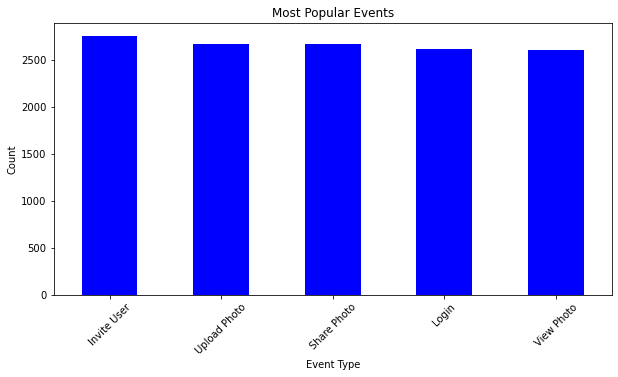

In [68]:
# Display a plot to show which event is most popular
event_counts = events['event_type'].value_counts()
print(event_counts);

plt.figure(figsize=(10, 5))
event_counts.plot(kind='bar', color='blue')
plt.title("Most Popular Events")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [69]:
# Print the most popular event
most_popular_event = event_counts.idxmax()
print("Most popular event:", most_popular_event)

Most popular event: Invite User


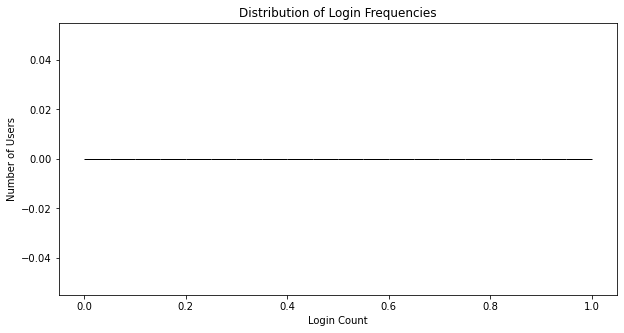

Average login frequency per user: nan


In [70]:
# Print the average login frequency
login_counts = events[events['event_type']=='login'].groupby('user_id').size()
plt.figure(figsize=(10,5))
plt.hist(login_counts,bins=20,color='blue',edgecolor='black')
plt.title("Distribution of Login Frequencies")
plt.xlabel("Login Count")
plt.ylabel("Number of Users")
plt.show()
print("Average login frequency per user:", login_counts.mean())

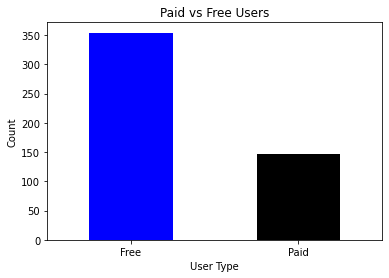

Free    354
Paid    146
Name: user_type, dtype: int64


In [72]:
# Print number of paid vs free users
user_type_counts = users['user_type'].value_counts()
plt.figure(figsize=(6, 4))
user_type_counts.plot(kind='bar', color=['blue', 'black'])
plt.title("Paid vs Free Users")
plt.xlabel("User Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()
print(user_type_counts)

In [74]:
# Print average subscription duration
subscriptions['start_date'] = pd.to_datetime(subscriptions['start_date'])
subscriptions['end_date'] = pd.to_datetime(subscriptions['end_date'])
subscriptions['subscription_duration'] = (subscriptions['end_date'] - subscriptions['start_date']).dt.days
print("Average subscription duration:", subscriptions['subscription_duration'].mean(), 'days')

Average subscription duration: 207.9931506849315 days


In [75]:
#How many users remain active even after signing up

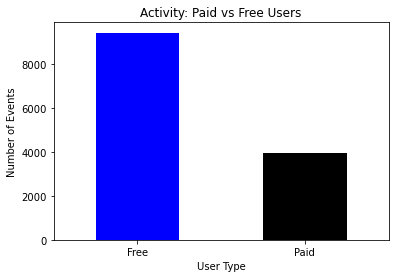

user_type
Free    9407
Paid    3926
Name: event_id, dtype: int64


In [77]:
# Compare user activity of paid vs unpaid users
merged_data = events.merge(users, on='user_id', how='left')
activity_counts = merged_data.groupby('user_type')['event_id'].count()
plt.figure(figsize=(6, 4))
activity_counts.plot(kind='bar', color=['blue', 'black'])
plt.title("Activity: Paid vs Free Users")
plt.xlabel("User Type")
plt.ylabel("Number of Events")
plt.xticks(rotation=0)
plt.show()
print(activity_counts)

In [79]:
# Print most used feature for each paid and free user
event_user_type = merged_data.groupby(['user_type', 'event_type'])['event_id'].count().reset_index()
most_used_feature = event_user_type.loc[event_user_type.groupby('user_type')['event_id'].idxmax()]
print("Most used feature by paid and free users:")
print(most_used_feature)

Most used feature by paid and free users:
  user_type   event_type  event_id
0      Free  Invite User      1962
5      Paid  Invite User       796


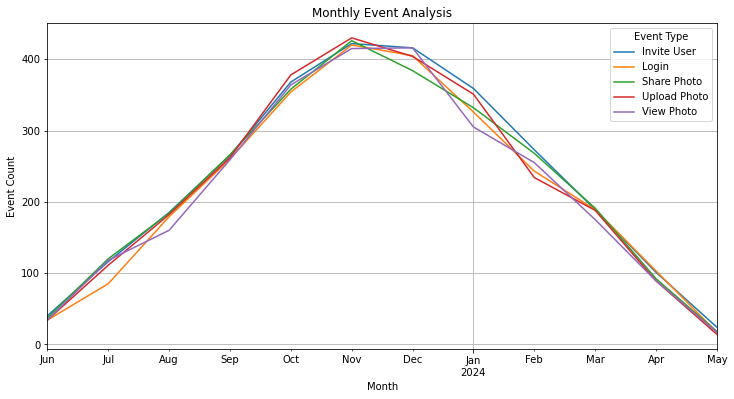

In [78]:
# Print analysis of features month-wise
events['event_month'] = pd.to_datetime(events['event_timestamp']).dt.to_period('M')
monthly_analysis = events.groupby(['event_month', 'event_type']).size().unstack()
monthly_analysis.plot(kind='line', figsize=(12, 6))
plt.title("Monthly Event Analysis")
plt.xlabel("Month")
plt.ylabel("Event Count")
plt.legend(title="Event Type")
plt.grid()
plt.show()

## Experimentation & A/B Testing Readiness
Proposed Experiment: Enhancing User Engagement with Emoji Reactions
To improve user engagement, I propose introducing emoji reactions (thumbs up and thumbs down) on user-generated content such as photos. This feature aims to encourage more interaction and engagement from both free and paid users. The experiment will compare engagement metrics before and after implementing this feature.

### Key Metrics

Feature Adoption Rate: Percentage of users who interact with emoji reactions.

Engagement Metrics: Changes in photo views and shares after introducing emoji reactions.

Unpaid User Engagement: Increase in interaction from free-tier users.

Paid User Engagement: Whether paid users exhibit higher engagement post-feature introduction.

Conversion Rate: Percentage of unpaid users converting to paid users after interacting with the feature.

### Success Criteria:
The experiment will be considered successful if:

There is a statistically significant increase in engagement (views, shares) after introducing emoji reactions.

Free-tier users demonstrate higher engagement with the platform.

Paid users show increased interaction with content.

The feature contributes to an increase in the conversion rate from free to paid users.

### Analysis Approach:
To evaluate the effectiveness of the feature, I will conduct an A/B test:

Randomized User Groups: Users will be randomly split into control (no emoji reactions) and treatment (with emoji reactions) groups.

Significance Testing: Conduct hypothesis testing to determine whether observed engagement differences are statistically significant.

Retention Analysis: Assess whether users continue to engage with the feature over time.

This approach will ensure a data-driven evaluation of the impact of emoji reactions on user engagement and inform further iterations of the feature.

## SQL Challenge

#### sql_retention
with last_three_signup as (
select distinct user_id from user where
signup_date>=((SELECT MAX(start_date) - INTERVAL '3' month FROM subscription))),

retained_days_last_three_months as (
SELECT s.user_id, end_date-start_date as retained_days
from subscription s inner join last_three_signup lts
on s.user_id=lts.user_id) 

select cast(avg(retained_days) as int) as retention
from retained_days_last_three_months;

#### sql_top_features
SELECT event_type, COUNT(*) as event_count
FROM events
GROUP BY event_type
ORDER BY event_count DESC
LIMIT 3;